## Perceived usefulness has no impact on the intention to purchase online

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../../data/cleaned/cleaned_survey_data.csv')

print(f"Dataset shape: {data.shape}")
print(f"Number of responses: {len(data)}")

Dataset shape: (825, 134)
Number of responses: 825


In [5]:
pu_columns = ['pu_product_1', 'pu_product_2', 'pu_convenience_1', 'pu_convenience_2', 'pu_cost_1', 'pu_cost_2', 'pu_info_1', 'pu_info_2', 'pu_personalization_1', 'pu_personalization_2']
intection_columns= ['opi_satisfaction', 'opi_behavior_change', 'opi_convenience', 'opi_value']
print(pu_columns)
print(intection_columns)

['pu_product_1', 'pu_product_2', 'pu_convenience_1', 'pu_convenience_2', 'pu_cost_1', 'pu_cost_2', 'pu_info_1', 'pu_info_2', 'pu_personalization_1', 'pu_personalization_2']
['opi_satisfaction', 'opi_behavior_change', 'opi_convenience', 'opi_value']


In [6]:
missing_data=pd.DataFrame({
    'Missing Values': data[pu_columns + intection_columns].isnull().sum(),
    'Percentage': data[pu_columns + intection_columns].isnull().sum() / len(data) * 100
})

print("\nMissing values in key columns:")
print(missing_data)


Missing values in key columns:
                      Missing Values  Percentage
pu_product_1                       0         0.0
pu_product_2                       0         0.0
pu_convenience_1                   0         0.0
pu_convenience_2                   0         0.0
pu_cost_1                          0         0.0
pu_cost_2                          0         0.0
pu_info_1                          0         0.0
pu_info_2                          0         0.0
pu_personalization_1               0         0.0
pu_personalization_2               0         0.0
opi_satisfaction                   0         0.0
opi_behavior_change                0         0.0
opi_convenience                    0         0.0
opi_value                          0         0.0


In [ ]:
print("Basic statistics of perseved usefulness variables:")
print(data[pu_columns].describe())
print("\nBasic statistics of intention to use variables:")
print(data[intection_columns].describe())

Basic statistics of perseved easy of use variables:
       pu_product_1  pu_product_2  pu_convenience_1  pu_convenience_2  \
count    825.000000    825.000000        825.000000        825.000000   
mean       3.356364      3.313939          3.665455          3.607273   
std        0.811947      0.748534          0.918833          0.885945   
min        1.000000      1.000000          1.000000          1.000000   
25%        3.000000      3.000000          3.000000          3.000000   
50%        3.000000      3.000000          4.000000          3.000000   
75%        4.000000      4.000000          4.000000          4.000000   
max        5.000000      5.000000          5.000000          5.000000   

        pu_cost_1   pu_cost_2   pu_info_1   pu_info_2  pu_personalization_1  \
count  825.000000  825.000000  825.000000  825.000000            825.000000   
mean     3.115152    3.161212    3.126061    3.166061              3.219394   
std      0.774331    0.818149    0.683447    0.814202


Correlation matrix:


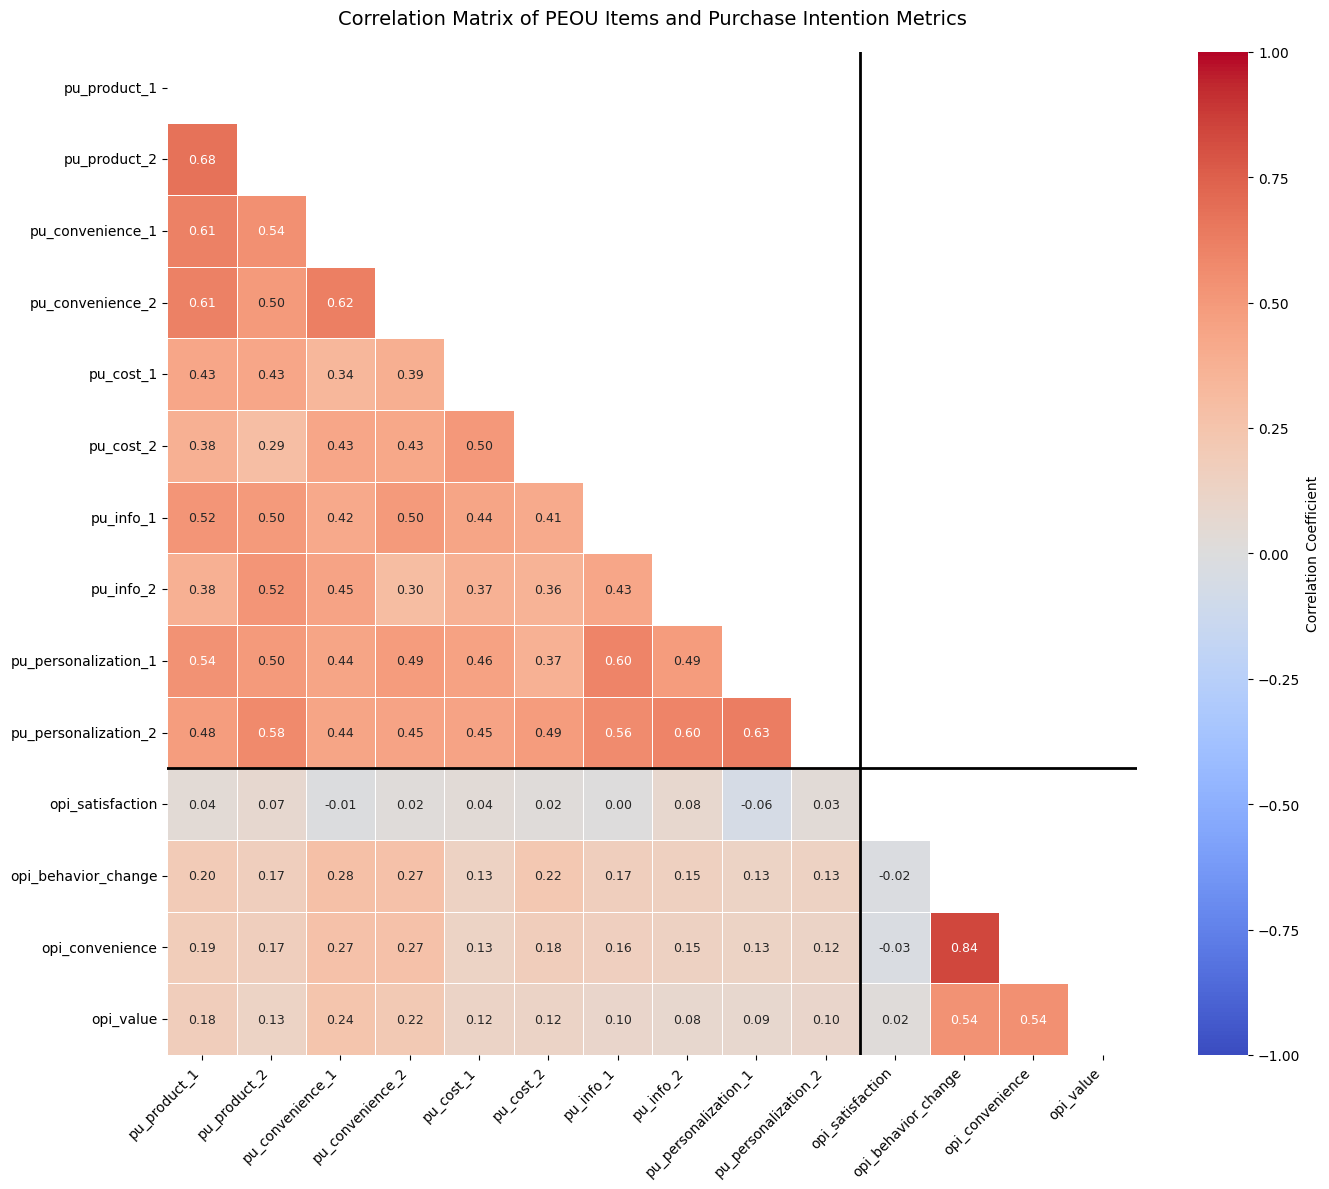

In [8]:
corr_matrix=data[pu_columns + intection_columns].corr()
print("\nCorrelation matrix:")
# print(corr_matrix)
# Assuming your correlation matrix is stored in a variable called 'corr_matrix'
plt.figure(figsize=(14, 12))

# Create a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap with improved settings
ax = sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1,
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 9},
            cbar_kws={'label': 'Correlation Coefficient'})

# Improve readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
plt.title('Correlation Matrix of PEOU Items and Purchase Intention Metrics', pad=20, fontsize=14)
plt.tight_layout()

# Add lines to separate PEOU items from outcome variables
plt.axhline(y=10, color='black', linewidth=2)
plt.axvline(x=10, color='black', linewidth=2)

plt.show()


In [ ]:
# Calculate PEOU composite score (average of all PEOU columns)
data['Pu_score'] = data[pu_columns].mean(axis=1)
data['Intention_score'] = data[intection_columns].mean(axis=1)



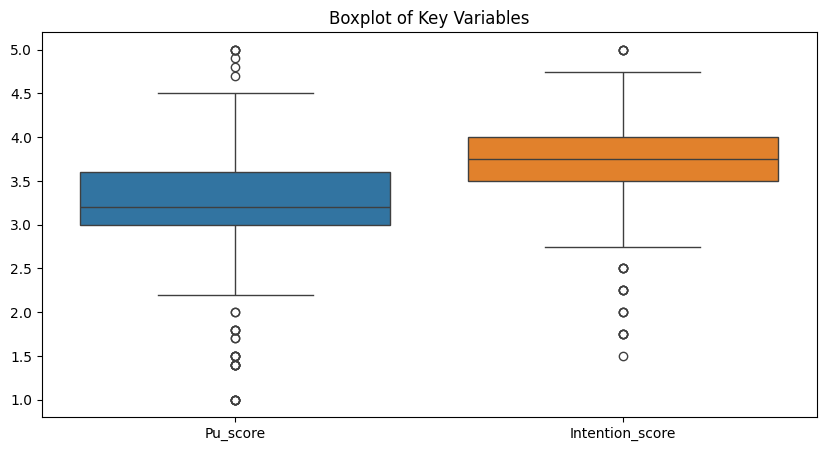

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['Pu_score', 'Intention_score']])
plt.title('Boxplot of Key Variables')
plt.show()

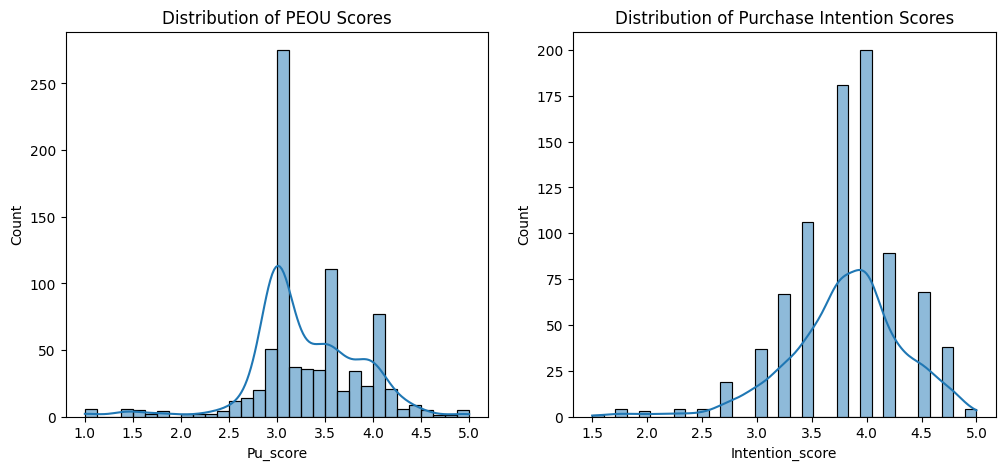

PEOU normality p-value: 0.0000
Purchase intention normality p-value: 0.0000


In [11]:
# Distribution of PEOU scores
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Pu_score'], kde=True)
plt.title('Distribution of PEOU Scores')

# Distribution of purchase intention
plt.subplot(1,2,2)
sns.histplot(data['Intention_score'], kde=True)
plt.title('Distribution of Purchase Intention Scores')
plt.show()

# Normality tests
from scipy.stats import shapiro
_, p_peou = shapiro(data['Pu_score'])
_, p_purchase = shapiro(data['Intention_score'])
print(f"PEOU normality p-value: {p_peou:.4f}") # p > 0.05 = normal
print(f"Purchase intention normality p-value: {p_purchase:.4f}")

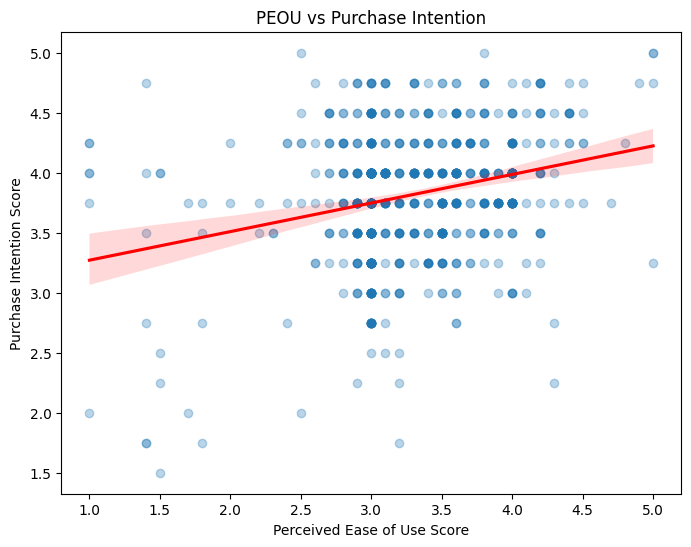

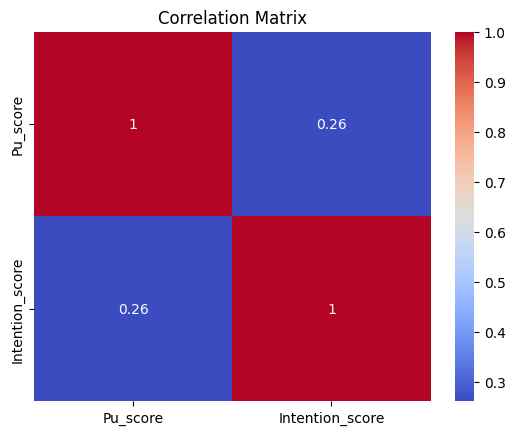

In [12]:
# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='Pu_score', y='Intention_score', data=data, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('PEOU vs Purchase Intention')
plt.xlabel('Perceived Ease of Use Score')
plt.ylabel('Purchase Intention Score')
plt.show()

# Correlation matrix
corr_matrix = data[['Pu_score', 'Intention_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
from pingouin import cronbach_alpha

# For PEOU scale
alpha_peou, _ = cronbach_alpha(data[pu_columns])
print(f"Cronbach's alpha for PEOU: {alpha_peou:.3f}")

# For purchase intention scale
alpha_purchase, _ = cronbach_alpha(data[intection_columns])
print(f"Cronbach's alpha for Purchase Intention: {alpha_purchase:.3f}")

# Interpretation: >0.7 acceptable, >0.8 good, >0.9 excellent


Cronbach's alpha for PEOU: 0.898
Cronbach's alpha for Purchase Intention: 0.626


In [14]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['Pu_score'], data['Intention_score'])
print("Pearson Correlation Test Results")
print(f"Pearson correlation coefficient = {corr:.3f}\np-value = {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print(f"The correlation is statistically significant (p < {alpha}).")
    print("Reject the null hypothesis: Perceived ease of use has impact on intention to purchase")
else:
    print(f"The correlation is not statistically significant (p > {alpha}).")
    print("Fail to reject the null hypothesis: No evidence that Perceived ease of use impacts purchase intention.")
# Interpretation:
# - If p < 0.05 → Reject H₀ (significant correlation)
# - Check r value: 
#   - 0.1-0.3 = Weak, 0.3-0.5 = Moderate, >0.5 = Strong

Pearson Correlation Test Results
Pearson correlation coefficient = 0.261
p-value = 0.0000
The correlation is statistically significant (p < 0.05).
Reject the null hypothesis: Perceived ease of use has impact on intention to purchase


In [15]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


X = data['Pu_score'].values.reshape(-1, 1)
y = data['Intention_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nSimple Linear Regression Results:")
print(f"Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

# Define variables
X = data['Pu_score']  # Independent variable
y = data['Intention_score']  # Dependent variable

# Add a constant (intercept) term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Key outputs:
# - R-squared (how much variance is explained)
# - Coefficient (β) for PEOU (direction & strength of effect)
# - p-value (if < 0.05, PEOU has a significant effect)


Simple Linear Regression Results:
Coefficient (Slope): 0.2184
Intercept: 3.1068
R-squared: 0.0931
Root Mean Squared Error: 0.4796
                            OLS Regression Results                            
Dep. Variable:        Intention_score   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     60.35
Date:                Tue, 13 May 2025   Prob (F-statistic):           2.36e-14
Time:                        21:25:43   Log-Likelihood:                -600.38
No. Observations:                 825   AIC:                             1205.
Df Residuals:                     823   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]



### 5.4 Non-Linear Relationship Testing ###
Polynomial Regression Results:
                            OLS Regression Results                            
Dep. Variable:        Intention_score   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     30.17
Date:                Tue, 13 May 2025   Prob (F-statistic):           2.26e-13
Time:                        21:26:21   Log-Likelihood:                -600.35
No. Observations:                 825   AIC:                             1207.
Df Residuals:                     822   BIC:                             1221.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

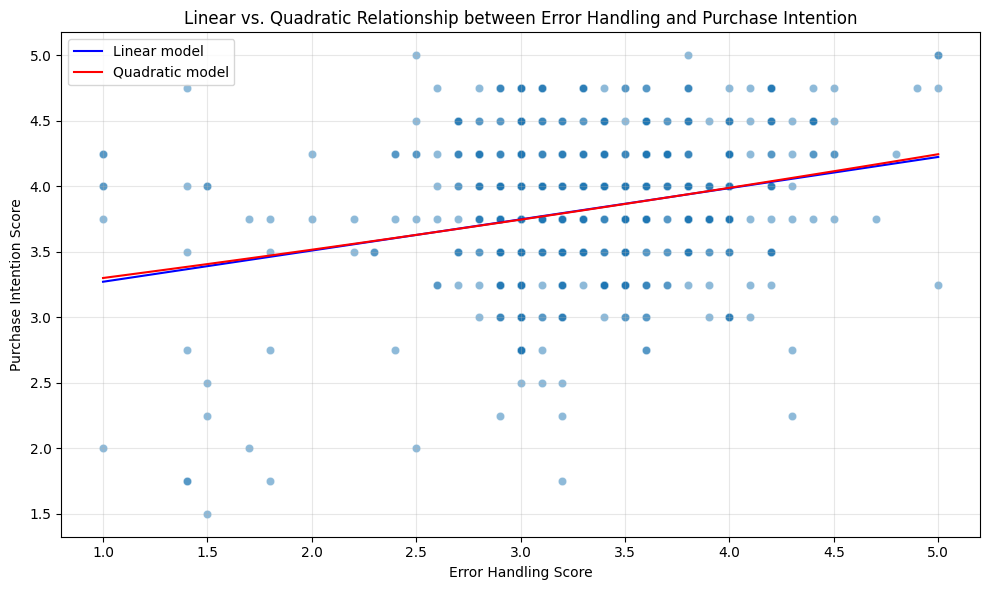

In [16]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# Test for non-linear relationships
print("\n### 5.4 Non-Linear Relationship Testing ###")

# Create polynomial features
X_poly = data['Pu_score'].values.reshape(-1, 1)
X_poly_squared = np.column_stack((X_poly, X_poly**2))
X_poly_with_const = sm.add_constant(X_poly_squared)

# Fit quadratic model
poly_model = sm.OLS(data['Intention_score'], X_poly_with_const).fit()

print("Polynomial Regression Results:")
print(poly_model.summary())

# Compare models
print("\nModel Comparison:")
print(f"Linear R-squared: {model.rsquared:.4f}")
print(f"Quadratic R-squared: {poly_model.rsquared:.4f}")
print(f"R-squared improvement: {poly_model.rsquared - model.rsquared:.4f}")

# Test if the improvement is significant
if poly_model.pvalues[2] < 0.05:
    print(f"The quadratic term is significant (p = {poly_model.pvalues[2]:.4f})")
    print("The relationship between error handling and purchase intention is non-linear.")
    
    # Interpret the direction
    if poly_model.params[2] > 0:
        print("The positive quadratic term indicates that the effect accelerates at higher error handling values.")
    else:
        print("The negative quadratic term indicates diminishing returns at higher error handling values.")
else:
    print(f"The quadratic term is not significant (p = {poly_model.pvalues[2]:.4f})")
    print("No evidence of a non-linear relationship. The linear model is sufficient.")

# Visualize both models
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pu_score', y='Intention_score', data=data, alpha=0.5)

# Add linear regression line
x_range = np.linspace(data['Pu_score'].min(), data['Pu_score'].max(), 100)
y_linear = model.params[0] + model.params[1] * x_range
plt.plot(x_range, y_linear, color='blue', label='Linear model')

# Add polynomial regression curve
y_poly = poly_model.params[0] + poly_model.params[1] * x_range + poly_model.params[2] * x_range**2
plt.plot(x_range, y_poly, color='red', label='Quadratic model')

plt.title('Linear vs. Quadratic Relationship between Error Handling and Purchase Intention')
plt.xlabel('Error Handling Score')
plt.ylabel('Purchase Intention Score')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()